# Prepare the dataset

In [10]:
import pandas as pd

df=pd.read_csv('AB_test_data.csv')

df

,purchase_TF,Variant,date,id
0,False,A,08/11/2019,0x25b44a
1,False,B,27/08/2020,0x46271e
2,False,A,11/06/2020,0x80b8f1
3,False,B,22/08/2020,0x8d736d
4,False,A,05/08/2020,0x96c9c8
...,...,...,...,...
129995,False,A,23/07/2020,0x4089c2
129996,False,A,24/06/2020,0x6a5e3a
129997,False,A,12/10/2019,0x95e302
129998,False,A,18/03/2020,0x7c4afa


In [11]:
a=df.groupby('Variant')['purchase_TF'].value_counts()
a_df = pd.DataFrame(a)
a_df

purchase_TF
Variant purchase_TF             
A       False             106298
        True               18702
B       False               4117
        True                 883

In [12]:
a_df.index

MultiIndex([('A', False),
            ('A',  True),
            ('B', False),
            ('B',  True)],
           names=['Variant', 'purchase_TF'])

# 1. Conduct an AB Test

In [16]:
A_False=a_df.loc[('A',False), 'purchase_TF']
print(A_False)
A_True=a_df.loc[('A',True), 'purchase_TF']
print(A_True)
B_True=a_df.loc[('B',True), 'purchase_TF']
print(B_True)
B_False=a_df.loc[('B',False), 'purchase_TF']
print(B_False)

106298
18702
883
4117


In [17]:
p=A_True/(A_False+A_True)
p

0.149616

In [18]:
p_hat=B_True/(B_True+B_False)
p_hat

0.1766

In [19]:
import math
z=(p_hat-p)/math.sqrt(p_hat*(1-p_hat)/5000)
z

5.003691773651441

In [23]:
if math.fabs(z) >=1.64:
        print('z score is %f. Reject the null hypotheis and conclude that Alternative B improved conversion rates over alternative A.' %(z))
else:
        print('z score is %f. Fail to reject the null hypothesis and conclude that Alternative B did not improve conversion rates over alternative A.'%(z))
        

z score is 5.003692. Reject the null hypotheis and conclude that Alternative B improved conversion rates over alternative A.


# 2. Calculate the optimal sample size

Optimal sample size balances committing Type I and Type 2 error.
For proportions, assuming large enough data to use normal approximation to binomial distribution, variance = p(1-p) such that: 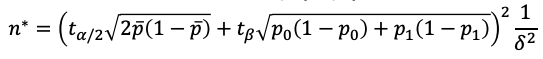

where p_bar is the average of the sample
proportions.

According to the calculation above, p0=0.149616, p1=0.1766, by searching the t-distribution table, t(0.025)=1.96, t(0.2)=1.28

In [66]:
p0 = 0.1507
p1 = 0.149616
p2 = 0.1766
p_average=0.1631
delta = p2-p1


In [62]:
import scipy.stats as st
t_0025=st.norm.ppf(0.975)
t_0025

1.959963984540054

In [63]:
t_02=st.norm.ppf(0.8)
t_02

0.8416212335729143

In [72]:
a = t_0025 * math.sqrt(2*p_average*(1-p_average))
b = t_02 * math.sqrt(p1*(1-p1)+p2*(1-p2))
delta = p2-p1
sample_size = ((a+b) * (a+b)) / ((delta)*(delta))   
sample_size


2941.6001203133483

Therefore, the optimal sample size is 2942.


# Conduct the test 10 times

In [73]:
import pandas as pd
sample1 = df.sample(n=2942)
sample2 = df.sample(n=2942)
sample3 = df.sample(n=2942)
sample4 = df.sample(n=2942)
sample5 = df.sample(n=2942)
sample6 = df.sample(n=2942)
sample7 = df.sample(n=2942)
sample8 = df.sample(n=2942)
sample9 = df.sample(n=2942)
sample10 = df.sample(n=2942)

sample1.head()
sample2.head()
sample3.head()
sample4.head()
sample5.head()
sample6.head()
sample7.head()
sample8.head()
sample9.head()
sample10.head()

,purchase_TF,Variant,date,id
37256,False,A,2020/6/30,0x55447f
28639,False,A,2020/8/1,0x5a7afd
83724,False,A,2019/12/28,0x487964
61488,False,A,2020/7/12,0x56eb9f
121819,False,A,2020/3/25,0x3ed4f5


In [74]:
list = [sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10]

In [75]:
i = 0
while i < 10:
    df = list[i]
    print(df)
    a=df.groupby('Variant')['purchase_TF'].value_counts()
    a_df = pd.DataFrame(a)
    A_False=a_df.loc[('A',False), 'purchase_TF']
    A_True=a_df.loc[('A',True), 'purchase_TF']
    B_True=a_df.loc[('B',True), 'purchase_TF']
    B_False=a_df.loc[('B',False), 'purchase_TF']
    p=A_True/(A_False+A_True)
    p_hat=B_True/(B_True+B_False)
    z=(p_hat-p)/math.sqrt(p_hat*(1-p_hat)/5000)
    if math.fabs(z) >=1.64:
        print('z score is %f.Reject the null hypotheis and conclude that Alternative B improved conversion rates over alternative A.' %(z))
    else:
        print('z score is %f. Fail to reject the null hypothesis and conclude that Alternative B did not improve conversion rates over alternative A.'%(z))
    i += 1


        purchase_TF Variant       date        id
64639         False       A   2020/4/3  0x472d19
120680        False       A   2020/6/5  0x6d7eb8
24461         False       A  2020/6/13  0x917044
30580         False       A   2020/5/2  0x8cf647
116462        False       A   2020/8/8  0x209336
...             ...     ...        ...       ...
94660          True       A  2019/10/3  0x21772f
22967         False       A   2020/5/7  0x7ba45c
26502         False       A  2019/8/28  0x57c25f
52012          True       A  2019/8/15  0x916048
89631          True       A  2019/8/13  0x278285

[2942 rows x 4 columns]
z score is 0.158743. Fail to reject the null hypothesis and conclude that Alternative B did not improve conversion rates over alternative A.
        purchase_TF Variant       date        id
64166         False       A  2019/9/29  0x1a0517
51789          True       A  2019/8/15  0x17ac80
100373        False       A  2020/3/25  0x4a7ac1
28656          True       A   2020/4/7  0x4f3617
2

# results: 
the optimal sample size is 2942 and in the 10 samples generated, only 3 samples conclude that Alternative B did not improve conversion rates over alternative A; 7 samples conclude that Alternative B improved conversion rates over alternative A.

# 3 Sequential Testing

In [24]:
alpha = 0.05
ln_A=math.log(1/alpha)
ln_A

2.995732273553991

In [25]:
beta = 0.2
ln_B=math.log(beta)
ln_B

-1.6094379124341003

In [26]:
PA=p
PB=p_hat

In [30]:
from random import sample
ln_0_xi = math.log((1-PA)/(1-PB))
ln_1_xi = math.log(PA/PB)
def SPRT():
    ln_lamba = 0
    i=0
    B_sample = sample(list(df['purchase_TF'].values),2942)
    for record in B_sample:
        if ln_lamba<ln_A and ln_lamba>ln_B:
            if record==0:
                ln_lamba=ln_lamba+ln_0_xi
            else:
                ln_lamba=ln_lamba+ln_1_xi
            i+=1
        elif ln_lamba>=ln_A:
            return(i,'Reject H0')
            break
        else:
            return(i,'Fail to reject H0')
            break

In [31]:
result_3 = [SPRT() for i in range(10)]
result_3

[(1156, 'Reject H0'),
 (1205, 'Reject H0'),
 (241, 'Reject H0'),
 (296, 'Reject H0'),
 (572, 'Reject H0'),
 (505, 'Reject H0'),
 (462, 'Reject H0'),
 (431, 'Reject H0'),
 (751, 'Reject H0'),
 (253, 'Reject H0')]

In [32]:
total = 0
for item in result_3:
    total += item[0]
print('The average number of iterations required to stop the test is:',total/10)

The average number of iterations required to stop the test is: 587.2


Based on the optimal sample size in question 2, we conduct the sequential test for 10 times. In all of the SPRT tests, we stop the test prior to using full samples, about 587.2 iterations to stop the test on average. 